# Load Data

In [112]:
import warnings
warnings.filterwarnings('ignore')

# import the necessary librarie
import numpy as np
import pandas as pd


In [113]:
file_path = "./credit_score.csv"
df = pd.read_csv(file_path)
df.head()

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0


# Preprocessing Data

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

All of the columns are numeric except for CAT_GAMBLING and CUST_ID. Removing CUST_ID column 

In [115]:
# drop the customer column from dataset
df = df.drop('CUST_ID', axis = 1)

In [116]:
#replace the values with integer mapping of High = 2, Low =1 and No = 0
gambling = {'High':2,'Low':1,'No':0}
df["CAT_GAMBLING"] = df["CAT_GAMBLING"].map(gambling)
df.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,0.0568,...,0.0000,0.0625,2,1,0,0,0,0,444,1
1,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,0.0754,...,0.7692,0.2222,0,1,0,0,1,0,625,0
2,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,0.0374,...,1.4286,0.0578,2,1,0,0,1,0,469,1
3,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,0.0850,...,1.2500,0.1282,2,1,0,0,1,0,559,0
4,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,0.0132,...,0.1163,0.0568,2,1,1,1,1,1,473,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCOME                   1000 non-null   int64  
 1   SAVINGS                  1000 non-null   int64  
 2   DEBT                     1000 non-null   int64  
 3   R_SAVINGS_INCOME         1000 non-null   float64
 4   R_DEBT_INCOME            1000 non-null   float64
 5   R_DEBT_SAVINGS           1000 non-null   float64
 6   T_CLOTHING_12            1000 non-null   int64  
 7   T_CLOTHING_6             1000 non-null   int64  
 8   R_CLOTHING               1000 non-null   float64
 9   R_CLOTHING_INCOME        1000 non-null   float64
 10  R_CLOTHING_SAVINGS       1000 non-null   float64
 11  R_CLOTHING_DEBT          1000 non-null   float64
 12  T_EDUCATION_12           1000 non-null   int64  
 13  T_EDUCATION_6            1000 non-null   int64  
 14  R_EDUCATION              

All the columns are now numeric

# Normalize the data using MinMax Scaler

From our EDA analysis we found there were lot of outliers in the data. We can go with clippings to remove some outliers. 

In [118]:
cols=[]
for i in df.columns:
    if df[i].nunique()>2:
        cols.append(i)

In [119]:
from sklearn.preprocessing import MinMaxScaler
mmax=MinMaxScaler()
df[cols] = mmax.fit_transform(df[cols])


# Goal is to predict "default" feature using the input features. Splitting the set to x and y variables

In [120]:

y = df['DEFAULT']
x = df[['INCOME', "SAVINGS","DEBT","R_SAVINGS_INCOME","R_DEBT_INCOME","R_DEBT_SAVINGS","T_CLOTHING_12","T_CLOTHING_6","R_CLOTHING","R_CLOTHING_INCOME","R_CLOTHING_SAVINGS","R_CLOTHING_DEBT","T_EDUCATION_12","T_EDUCATION_6","R_EDUCATION","R_EDUCATION_INCOME","R_EDUCATION_SAVINGS","R_EDUCATION_DEBT","T_ENTERTAINMENT_12","T_ENTERTAINMENT_6","R_ENTERTAINMENT","R_ENTERTAINMENT_INCOME","R_ENTERTAINMENT_SAVINGS","R_ENTERTAINMENT_DEBT","T_FINES_12","T_FINES_6","R_FINES","R_FINES_INCOME","R_FINES_SAVINGS","R_FINES_DEBT","T_GAMBLING_12","T_GAMBLING_6","R_GAMBLING","R_GAMBLING_INCOME","R_GAMBLING_SAVINGS","R_GAMBLING_DEBT","T_GROCERIES_12","T_GROCERIES_6","R_GROCERIES","R_GROCERIES_INCOME","R_GROCERIES_SAVINGS","R_GROCERIES_DEBT","T_HEALTH_12","T_HEALTH_6","R_HEALTH","R_HEALTH_INCOME","R_HEALTH_SAVINGS","R_HEALTH_DEBT","T_HOUSING_12","T_HOUSING_6","R_HOUSING","R_HOUSING_INCOME","R_HOUSING_SAVINGS","R_HOUSING_DEBT","T_TAX_12","T_TAX_6","R_TAX","R_TAX_INCOME","R_TAX_SAVINGS","R_TAX_DEBT","T_TRAVEL_12","T_TRAVEL_6","R_TRAVEL","R_TRAVEL_INCOME","R_TRAVEL_SAVINGS","R_TRAVEL_DEBT","T_UTILITIES_12","T_UTILITIES_6","R_UTILITIES","R_UTILITIES_INCOME","R_UTILITIES_SAVINGS","R_UTILITIES_DEBT","T_EXPENDITURE_12","T_EXPENDITURE_6","R_EXPENDITURE","R_EXPENDITURE_INCOME","R_EXPENDITURE_SAVINGS","R_EXPENDITURE_DEBT","CAT_GAMBLING","CAT_DEBT","CAT_CREDIT_CARD","CAT_MORTGAGE","CAT_SAVINGS_ACCOUNT","CAT_DEPENDENTS","CREDIT_SCORE"
]]

# PCA Analysis. Reduce dimensionality and explain co variance

In [121]:
from sklearn.decomposition import PCA

## perform PCA on our data
pca = PCA()
pca.fit(x)

## let's check out how much variance 
## is explained by the first ten components
print("Percentage of variance explained:")
pca_x = (100*(pca.explained_variance_[0:]/sum(pca.explained_variance_)))
pca_xy = (pca.explained_variance_[0:]/sum(pca.explained_variance_))
   
for i, var in enumerate(pca_x):
    print(f"Explained variance for pca component {i + 1}: {var:.4f}")
    
print(sum(pca_x[:20]))
print(sum(pca_x[:15]))

Percentage of variance explained:
Explained variance for pca component 1: 31.0050
Explained variance for pca component 2: 10.5940
Explained variance for pca component 3: 8.9780
Explained variance for pca component 4: 6.9742
Explained variance for pca component 5: 5.4398
Explained variance for pca component 6: 4.9965
Explained variance for pca component 7: 4.1444
Explained variance for pca component 8: 3.1425
Explained variance for pca component 9: 2.0154
Explained variance for pca component 10: 1.8377
Explained variance for pca component 11: 1.8040
Explained variance for pca component 12: 1.3411
Explained variance for pca component 13: 1.3286
Explained variance for pca component 14: 1.2387
Explained variance for pca component 15: 1.1899
Explained variance for pca component 16: 1.1335
Explained variance for pca component 17: 1.0019
Explained variance for pca component 18: 0.8854
Explained variance for pca component 19: 0.8270
Explained variance for pca component 20: 0.8020
Explained var

Visualize the distribution in a chart

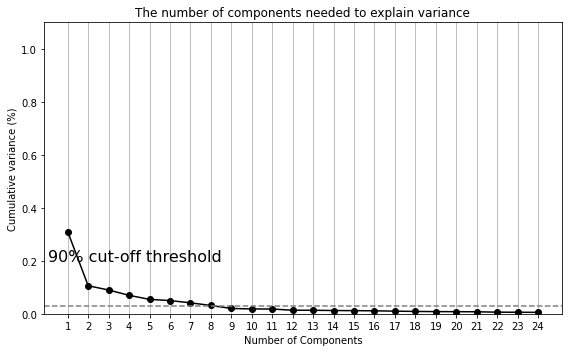

In [122]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,5)

fig, ax = plt.subplots()
xi = np.arange(1, 25, step=1)
yi = pca_xy[:24]

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='-', color='black')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 25, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.03, color='grey', linestyle='--')
plt.text(0.03, 0.2, '90% cut-off threshold', color = 'black', fontsize=16)

ax.grid(axis='x')
plt.tight_layout()
plt.savefig('pcavisualize_1.png', dpi=300)
plt.show()

From the above the first 15 PCs explain about 86% of the variation 

To find the amount of contribution from each feature variable. We can use below function. 

In [123]:
print(abs( pca.components_[0:15,:] ))

# Lets try to limit it to the first two variations which is 40% of variation

print(abs( pca.components_[0:2,:] ))

[[0.18092355 0.11684626 0.15399524 ... 0.00668012 0.15232738 0.01156294]
 [0.02041997 0.11281696 0.01312262 ... 0.00320107 0.42872369 0.01744272]
 [0.06553297 0.03900158 0.01396409 ... 0.00565004 0.29061006 0.05057997]
 ...
 [0.03533182 0.01774306 0.0474018  ... 0.02083665 0.07527157 0.11796484]
 [0.02840411 0.03310056 0.00672493 ... 0.03339153 0.01540976 0.10738416]
 [0.01870545 0.01602612 0.00124958 ... 0.00116584 0.28974092 0.01120339]]
[[1.80923554e-01 1.16846261e-01 1.53995238e-01 4.05518631e-02
  3.28631157e-02 9.27717173e-03 1.39326675e-01 8.38644880e-02
  1.78067731e-02 5.44693085e-03 9.21603635e-03 1.24770760e-02
  8.17115562e-02 8.12604389e-02 9.03371150e-03 1.26782519e-02
  1.04876070e-02 1.17463054e-03 1.51509537e-01 1.21300924e-01
  7.70092041e-03 4.92001654e-02 2.48264683e-02 2.12888730e-02
  1.23929061e-02 1.20226169e-02 2.41825716e-03 2.77069452e-03
  3.34268263e-03 2.23917886e-03 1.18091871e-01 1.13090186e-01
  3.41137137e-03 2.33624014e-02 1.95014637e-03 8.46300757e-0

In [124]:
## perform PCA on our data
## reduce down to 2 components
pca = PCA(n_components=15)
pca.fit(x)

## print out the original data shape
print(x.shape)

## transform the data
x_ENG = pca.transform(x)

## print out the new, engineered data shape
print(x_ENG.shape)



(1000, 85)
(1000, 15)


In [125]:
x_ENG[:,0:2]

array([[-0.6315634 , -0.517738  ],
       [-0.55324116,  0.03252102],
       [-0.64781441, -0.50569854],
       ...,
       [-0.86921564,  0.1340845 ],
       [-0.51320866,  0.09779654],
       [-0.72156011,  0.18872785]])

# Logistic regression Model

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
logistic_classifier = Pipeline([('eng', PCA(n_components=15)),
                                ('clf', LogisticRegression(solver='lbfgs'))])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

logistic_classifier.fit(x_train, y_train)

predictions = logistic_classifier.predict(x_test)

print("Accuracy, precision, recall, and F1 were:")
print(accuracy_score(y_test, predictions))
print(precision_score(y_test, predictions))
print(recall_score(y_test, predictions))
print(f1_score(y_test, predictions))  
print("")

Accuracy, precision, recall, and F1 were:
0.74
0.625
0.21929824561403508
0.3246753246753246



In [127]:
print(logistic_classifier.predict(x_test)[:6])

[0 0 0 1 0 0]


In [128]:
print(y_test[:6])

521    0
737    0
740    0
660    1
411    1
678    0
Name: DEFAULT, dtype: int64


In [129]:
#find the important features from model
from sklearn.inspection import permutation_importance
model_fi = permutation_importance(logistic_classifier, x, y)
for i,j in enumerate(model_fi['importances_mean']*100):
    print("feature ",i,"value",str(round(j, 2)) )


# from the above analysis looks like credit score is a major factor of important feature 

feature  0 value -0.08
feature  1 value 0.0
feature  2 value -0.1
feature  3 value 0.04
feature  4 value 1.32
feature  5 value 0.02
feature  6 value 0.2
feature  7 value 0.14
feature  8 value 0.14
feature  9 value -0.16
feature  10 value 0.0
feature  11 value -0.02
feature  12 value -0.1
feature  13 value -0.1
feature  14 value 0.04
feature  15 value -0.16
feature  16 value -0.02
feature  17 value -0.08
feature  18 value -0.2
feature  19 value -0.02
feature  20 value -0.06
feature  21 value -0.06
feature  22 value 0.0
feature  23 value -0.1
feature  24 value 0.0
feature  25 value 0.02
feature  26 value -0.02
feature  27 value 0.0
feature  28 value 0.0
feature  29 value 0.0
feature  30 value -0.08
feature  31 value -0.18
feature  32 value 0.04
feature  33 value 0.08
feature  34 value 0.0
feature  35 value -0.02
feature  36 value -0.08
feature  37 value -0.12
feature  38 value -0.1
feature  39 value -0.14
feature  40 value 0.04
feature  41 value -0.08
feature  42 value 0.02
feature  43 v

# Logistic regression Model using KFold validation

In [130]:
from sklearn.model_selection import KFold

## initialize the model
kf = KFold(n_splits=5)

## make lists to store our coefficients
ms = []
bs = []
## make a list to store our accuracy
accuracy_list = []

## loop over the folds
for train_index, validate_index in kf.split(x_train):
    
    # Train the model using the training sets
    logistic_classifier.fit(x_train.iloc[train_index,], pd.DataFrame(y_train.values[train_index]))
    
    # Train the model using the training sets
    #ms.append(logistic_classifier.coef_[0])
    #bs.append(logistic_classifier.intercept_[0])
    
    # predict on a separate testing set
    predictions = logistic_classifier.predict(x_train.iloc[validate_index,])
    
    # compute the Accuracy on the values corresponding to the training set
    accuracy_list.append(accuracy_score(y_train.values[validate_index], predictions))
    

    
# let's look at the output from one fold
#print(ms[0])
#print(bs[0])
print(accuracy_list)

[0.6833333333333333, 0.725, 0.8, 0.7583333333333333, 0.7]


Use GridSearchCV for finding the optimum hypertuning the paramters

In [131]:
from sklearn.model_selection import GridSearchCV
reg = LogisticRegression(solver='lbfgs')
pca = PCA(n_components=20)

trans_x = pca.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(trans_x, y, test_size=0.15, random_state=42)
print(x.shape)
print(trans_x.shape)
print(x_train.shape)
print(x_test.shape)

param_grid = [ {'penalty':['l2',None]},
              {'C': [0.001,0.01,0.1,1,10,100,1000]}]
   
reg_GS = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5)
reg_GS.fit(x_train, y_train)
print("Best Score:", reg_GS.best_score_)
print("Best Parameters:", reg_GS.best_params_)

(1000, 85)
(1000, 20)
(850, 20)
(150, 20)
Best Score: 0.74
Best Parameters: {'C': 100}


# Classification with Decision Tree Classifier

In [132]:
from sklearn.tree import DecisionTreeClassifier

# Note: Dimensionality Reduction has already been done with PCA
# Hence, using the truncated dataset, no need to run PCA once again.
print(x_train.shape)
print(y_train.shape )

# Initialize classifier and train with train data
classifier = DecisionTreeClassifier()
classifier.fit(X=x_train, y=y_train)

predictions = classifier.predict(x_test)

# Accuracy
acc = accuracy_score(y_test, predictions)
print(f'Accuracy: {acc}')

print(f'Precision: {precision_score(y_test, predictions)}')
print(f'Recall: {recall_score(y_test, predictions)}')
print(f'f1 Score: {f1_score(y_test, predictions)}') 

(850, 20)
(850,)
Accuracy: 0.6
Precision: 0.32075471698113206
Recall: 0.4146341463414634
f1 Score: 0.3617021276595745


# Classification with Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

# Note: Dimensionality Reduction has already been done with PCA
# Hence, using the truncated dataset, no need to run PCA once again.
print(x_train.shape)
print(y_train.shape )

# Initialize classifier and train with train data
classifier = RandomForestClassifier()
classifier.fit(X=x_train, y=y_train)

predictions = classifier.predict(x_test)

# Accuracy
acc = accuracy_score(y_test, predictions)
print(f'Accuracy: {acc}')

print(f'Precision: {precision_score(y_test, predictions)}')
print(f'Recall: {recall_score(y_test, predictions)}')
print(f'f1 Score: {f1_score(y_test, predictions)}') 


(850, 20)
(850,)
Accuracy: 0.74
Precision: 0.6
Recall: 0.14634146341463414
f1 Score: 0.23529411764705882
